<a href="https://colab.research.google.com/github/tranj8229/dss_sp19/blob/master/World_Health_and_Nutrition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import csv

In [3]:
# Original Data Frame
url = 'https://raw.githubusercontent.com/tranj8229/dss_sp19/master/nutrition-and-health.csv'
original_df = pd.read_csv(url)  
original_df

,Series Name,Series Code,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,145.245,145.245,145.245,146.2136,147.1822,148.1508,...,104.8868,98.6322,92.3776,86.123,81.7908,77.4586,73.1264,68.7942,..,..
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,35.7928,32.6304,29.468,28.6554,27.8428,27.0302,...,19.3662,19.8208,20.2754,20.73,20.7174,20.7048,20.6922,20.6796,..,..
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,108.0202,105.6896,103.359,101.6092,99.8594,98.1096,...,10.4346,10.8084,11.1822,11.556,11.2724,10.9888,10.7052,10.4216,..,..
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
5,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Angola,AGO,228,228,228,228,228,228,...,175.1394,172.0946,169.0498,166.005,163.1218,160.2386,157.3554,154.4722,..,..
6,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Antigua and Barbuda,ATG,146.1084,140.0432,133.978,127.798,121.618,115.438,...,53.001,51.755,50.509,49.263,48.113,46.963,45.813,44.663,..,..
7,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Arab World,ARB,126.075075760084,123.83897858097,121.764963301069,119.62901998022,117.47265486965,115.235836071937,...,50.1046104372653,49.9001179322243,49.7237574729017,49.5390740285026,49.111244470009,48.6475393890239,48.11455247461,47.4400688914731,..,..
8,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Argentina,ARG,65.1408,66.7214,68.302,71.4412,74.5804,77.7196,...,63.8308,63.8792,63.9276,63.976,63.7388,63.5016,63.2644,63.0272,..,..
9,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Armenia,ARM,41.3496,41.1748,41,40.9598,40.9196,40.8794,...,27.557,27.443,27.329,27.215,26.405,25.595,24.785,23.975,..,..


__GLOBAL MORTALITY RATE (UNDER THE AGE OF 5)__

In [6]:
pd.options.display.max_rows=500
mr_df = original_df[(original_df['Series Name'] == "Mortality rate, under-5 (per 1,000)")]

mr_df.index = range(len(mr_df.index))
mr_df.drop(columns = 'Series Name')

,Series Code,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,SH.DYN.MORT,Afghanistan,AFG,300.9,295.3,290,283.9,278.2,272.2,266.2,...,93.9,90,86.2,82.6,79.2,76,73.1,70.4,67.9,..
1,SH.DYN.MORT,Albania,ALB,..,..,..,..,..,..,..,...,12.8,12,11.3,10.7,10.1,9.7,9.4,9.1,8.8,..
2,SH.DYN.MORT,Algeria,DZA,240,234.9,228.5,221,212.4,203.1,193.4,...,28.3,27.4,26.7,26.1,25.7,25.3,24.9,24.5,24,..
3,SH.DYN.MORT,American Samoa,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,SH.DYN.MORT,Andorra,AND,..,..,..,..,..,..,..,...,4,3.9,3.9,3.8,3.7,3.6,3.5,3.4,3.3,..
5,SH.DYN.MORT,Angola,AGO,..,..,..,..,..,..,..,...,130,121.3,113.2,105.8,99.2,93.6,88.9,84.6,81.1,..
6,SH.DYN.MORT,Antigua and Barbuda,ATG,..,..,..,..,..,..,..,...,10.3,9.8,9.5,9.1,8.7,8.3,8,7.7,7.4,..
7,SH.DYN.MORT,Arab World,ARB,..,..,..,..,..,..,..,...,45.0212758247474,43.4889731496392,42.1702435745869,41.0795344730923,40.0062902027704,39.0919830543418,38.2012105185827,37.4480239303103,36.6612018059451,..
8,SH.DYN.MORT,Argentina,ARG,72.3,71.5,70.3,68.8,66.6,63.9,60.4,...,15,14.5,13.9,13.3,12.7,12,11.4,10.9,10.4,..
9,SH.DYN.MORT,Armenia,ARM,..,..,..,..,..,..,88,...,19,18,17.1,16.3,15.5,14.7,14,13.3,12.6,..


In [0]:
# PLOT OF MORTALITY RATES


___UNITED STATES OF AMERICA DATA FRAME ___

In [0]:
# USA DATA -ALL DATA-
pd.options.display.max_rows=500
usa_df = original_df[(original_df['Country Code'] == "USA")]

In [0]:
# USA DATA 1996 - 2016
new_usa_df = usa_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_usa_df.columns = ['Series Name [USA]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
copy_new_usa_df = new_usa_df

In [0]:
# USA DATA 1996 - 2016 (Cleaned)

for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_usa_df = new_usa_df[new_usa_df[i] != ".."]
    
new_usa_df.index = range(len(new_usa_df.index))

IMMUNIZATIONS AND INFANT MORTALITY (IN THE UNITED STATES)

In [10]:
# Immunizations and Infant Mortality

usa_IIM = new_usa_df[(new_usa_df['Series Name [USA]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, HepB3 (% of one-year-old children)") | (new_usa_df['Series Name [USA]'] == "Immunization, Hib3 (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_usa_df['Series Name [USA]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_usa_df['Series Name [USA]'] == "Mortality rate, under-5 (per 1,000)")]
new_usa_IIM = usa_IIM.T
new_usa_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_usa_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)','Immunization, HepB3 (% of one-year-old children)','Immunization, Hib3 (% of children ages 12-23 months)','Immunization, measles (% of children ages 12-23 months)','Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_usa_IIM.index = range(22)
IIM_usa = new_usa_IIM.drop(0)
IIM_usa = IIM_usa.apply(pd.to_numeric)
IIM_usa

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,95,82,91,91,91,9.2
2,1997,96,84,93,91,91,8.9
3,1998,96,87,93,92,91,8.7
4,1999,96,88,94,92,90,8.6
5,2000,94,90,93,91,90,8.4
6,2001,94,89,93,91,89,8.3
7,2002,94,88,93,91,90,8.2
8,2003,96,92,94,93,91,8.1
9,2004,96,92,94,93,92,8.1
10,2005,96,93,94,92,92,8.0


___CANADA DATA FRAME ___

In [0]:
# CAN DATA -ALL DATA-
can_df = original_df[(original_df['Country Code'] == "CAN")]

In [0]:
# CAN DATA 1996 - 2016

new_can_df = can_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_can_df.columns = ['Series Name [CAN]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
new_can_df.index = range(len(new_can_df.index))
copy_new_can_df = new_can_df

In [6]:
# CAN DATA 1996 - 2016 (Cleaned)
for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_can_df = new_can_df[new_can_df[i] != ".."]
    
new_can_df.index = range(len(new_can_df.index))
new_can_df

,Series Name [CAN],1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Adolescent fertility rate (births per 1,000 wo...",21.115,20.109,18.9676,17.8262,16.6848,15.5434,14.402,14.3096,14.2172,...,13.94,13.4188,12.8976,12.3764,11.8552,11.334,10.9476,10.5612,10.1748,9.7884
1,Age dependency ratio (% of working-age populat...,47.805620607616,47.6063946954001,47.2641533593114,46.8707710340118,46.4823842861192,46.0090139549868,45.5901598469655,45.205444663253,44.8306065842588,...,44.0335436673802,43.9338623586135,43.9814767638781,44.1961117526372,44.6816402149035,45.2045335696126,45.8107839611485,46.5217535977263,47.3310123302842,48.2439168641162
2,"Age dependency ratio, old",17.8569188750536,18.020279044959,18.1670752536503,18.2967984701924,18.413386554357,18.510894034896,18.5947443911324,18.6826131057403,18.7970074225969,...,19.3709379894121,19.6469418434562,20.0030330304898,20.4562115480122,20.9752354067053,21.5829135177451,22.2719106893461,23.0147898727102,23.7905704406224,24.5680808169337
3,"Age dependency ratio, young",29.9487017325625,29.5861156504411,29.0970781056611,28.5739725638194,28.0689977317622,27.4981199200908,26.9954154558332,26.5228315575127,26.0335991616619,...,24.6626056779682,24.2869205151574,23.9784437333882,23.739900204625,23.7064048081982,23.6216200518675,23.5388732718024,23.5069637250161,23.5404418896617,23.6758360471825
4,"Age population, age 0, female, interpolated",187843,179489,170029,161792,156479,154624,155595,158856,163472,...,180717,186731,191142,193130,192270,188879,184287,180438,178732,180234
5,"Age population, age 0, male, interpolated",197733,188562,178187,169229,163597,161922,163469,167498,172782,...,189944,195434,199408,201218,200562,197604,193591,190329,189107,190861
6,"Age population, age 01, female, interpolated",193603,184497,178203,172282,167694,159621,163026,162716,163744,...,174257,179447,183983,187104,193596,188661,187815,186933,186670,182001
7,"Age population, age 01, male, interpolated",203766,193663,186790,180418,175633,167178,171416,171579,173047,...,183834,188847,193205,196219,201881,197909,197208,196529,196516,192364
8,"Age population, age 02, female, interpolated",194311,193826,184823,180802,176921,169481,162700,166895,165276,...,171013,174348,178613,182282,188410,194105,189683,191017,191903,188565
9,"Age population, age 02, male, interpolated",204263,203829,193759,189498,185510,177683,170673,175914,174549,...,181180,184247,188536,192158,197526,202550,199152,200401,201358,198467


IMMUNIZATIONS AND INFANT MORTALITY (IN CANADA)

In [7]:
can_IIM = new_can_df[(new_can_df['Series Name [CAN]'] == "Immunization, DPT (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, Hib3 (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_can_df['Series Name [CAN]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_can_df['Series Name [CAN]'] == "Mortality rate, under-5 (per 1,000)")]
new_can_IIM = can_IIM.T
new_can_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_can_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)','Immunization, Hib3 (% of children ages 12-23 months)','Immunization, measles (% of children ages 12-23 months)','Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_can_IIM.index = range(22)
IIM_can = new_can_IIM.drop(0)
IIM_can = IIM_can.apply(pd.to_numeric)
IIM_can

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, Hib3 (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,90,84,97,89,6.7
2,1997,86,87,96,88,6.5
3,1998,90,88,96,88,6.4
4,1999,90,88,96,88,6.3
5,2000,89,88,96,88,6.2
6,2001,89,88,95,88,6.2
7,2002,88,88,95,88,6.1
8,2003,91,88,95,88,6.1
9,2004,91,91,94,91,6.1
10,2005,93,93,94,93,6.1


In [0]:
# IND DATA -ALL DATA-
pd.options.display.max_rows=500
ind_df = original_df[(original_df['Country Code'] == "IND")]

In [0]:
# IND DATA 1996 - 2016

new_ind_df = ind_df[['Series Name', '1996 [YR1996]','1997 [YR1997]','1998 [YR1998]','1999 [YR1999]','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]','2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]']]
new_ind_df.columns = ['Series Name [IND]', '1996', '1997', '1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
new_ind_df.index = range(len(new_ind_df.index))
copy_new_ind_df = new_ind_df

In [10]:
# IND DATA 1996 - 2016 (Cleaned)
for i in ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']:
    new_ind_df = new_ind_df[new_ind_df[i] != ".."]
    
new_ind_df.index = range(len(new_ind_df.index))
new_ind_df

,Series Name [IND],1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Adolescent fertility rate (births per 1,000 wo...",80.2784,76.854,73.515,70.176,66.837,63.498,60.159,57.039,53.919,...,44.559,41.7234,38.8878,36.0522,33.2166,30.381,28.9196,27.4582,25.9968,24.5354
1,Adults (ages 15+) and children (0-14 years) li...,2500000,2800000,3000000,3100000,3100000,3100000,3100000,3000000,2900000,...,2500000,2400000,2400000,2300000,2300000,2300000,2200000,2200000,2200000,2200000
2,Adults (ages 15+) and children (ages 0-14) new...,530000,430000,330000,270000,220000,190000,170000,150000,140000,...,120000,120000,120000,120000,120000,110000,110000,100000,99000,94000
3,Adults (ages 15+) living with HIV,2500000,2800000,2900000,3000000,3100000,3000000,3000000,2900000,2800000,...,2400000,2300000,2300000,2200000,2200000,2200000,2200000,2100000,2100000,2100000
4,Adults (ages 15+) newly infected with HIV,510000,400000,310000,250000,200000,170000,150000,130000,130000,...,110000,110000,110000,110000,110000,110000,100000,97000,93000,89000
5,Age dependency ratio (% of working-age populat...,67.9186790602134,67.1180460139476,66.2254903803023,65.2751770844814,64.2950707396344,63.5601874485198,62.7535314000319,61.9000954612322,61.0240065067589,...,58.6927637320521,57.9336057938146,57.1269046014287,56.2623446967214,55.5121639305217,54.6634111018054,53.77575351246,52.9360971300418,52.1929971683597,51.5228471113059
6,"Age dependency ratio, old",6.94730755962335,7.03151411163378,7.10348326185081,7.16769100216068,7.22771918942048,7.33351475786981,7.42907525761395,7.51273469687417,7.58140739275748,...,7.80462280462097,7.87190526277876,7.93221590560181,7.98980885431217,8.09591391997023,8.19178040404191,8.29257568080442,8.41770886693919,8.57797071700538,8.80030218076315
7,"Age dependency ratio, young",60.9713715005901,60.0865319023139,59.1220071184515,58.1074860823207,57.067351550214,56.22667269065,55.324456142418,54.387360764358,53.4425991140015,...,50.8881409274311,50.0617005310359,49.1946886958269,48.2725358424092,47.4162500105515,46.4716306977635,45.4831778316556,44.5183882631026,43.6150264513543,42.7225449305427
8,"Age population, age 0, female, interpolated",12165480,12258895,12359693,12447847,12508230,12526106,12515476,12484287,12445763,...,12369948,12341145,12271328,12144015,11936315,11673833,11408105,11209747,11126771,11198159
9,"Age population, age 0, male, interpolated",13431251,13524226,13609668,13685098,13748244,13795301,13827567,13844233,13845445,...,13776943,13720686,13618239,13458774,13226491,12939258,12651648,12437487,12346510,12422493


In [11]:
ind_IIM = new_ind_df[(new_ind_df['Series Name [IND]'] == "Immunization, DPT (% of children ages 12-23 months)") |(new_ind_df['Series Name [IND]'] == "Immunization, BCG (% of one-year-old children)") | (new_ind_df['Series Name [IND]'] == "Immunization, measles (% of children ages 12-23 months)") | (new_ind_df['Series Name [IND]'] == "Immunization, Pol3 (% of one-year-old children)") | (new_ind_df['Series Name [IND]'] == "Mortality rate, under-5 (per 1,000)")]
new_ind_IIM = ind_IIM.T
new_ind_IIM.insert(loc = 0, column = "Year", value = np.append([0], np.arange(1996,2017)), allow_duplicates=False)
new_ind_IIM.columns = ['Year','Immunization, DPT (% of children ages 12-23 months)','Immunization, BCG (% of children ages 12-23 months)','Immunization, measles (% of children ages 12-23 months)', 'Immunization, Pol3 (% of one-year-old children)','Mortality rate, under-5 (per 1,000)'] 
new_ind_IIM.index = range(22)
IIM_ind = new_ind_IIM.drop(0)
IIM_ind = IIM_ind.apply(pd.to_numeric)
IIM_ind

,Year,"Immunization, DPT (% of children ages 12-23 months)","Immunization, BCG (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Immunization, Pol3 (% of one-year-old children)","Mortality rate, under-5 (per 1,000)"
1,1996,79,66,66,67,106.0
2,1997,72,62,55,63,102.5
3,1998,73,61,53,60,98.9
4,1999,74,59,56,57,95.3
5,2000,74,58,56,57,91.7
6,2001,75,59,57,58,88.1
7,2002,75,59,56,58,84.6
8,2003,77,61,60,57,81.2
9,2004,80,63,64,58,77.8
10,2005,86,65,68,65,74.5


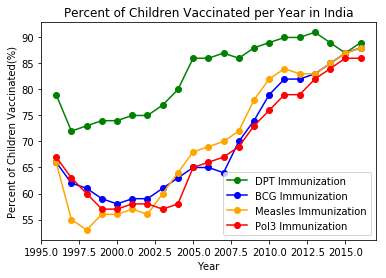

In [23]:
#Plot of India's % Vaccinations per Year
plt.plot(IIM_ind['Year'], IIM_ind['Immunization, DPT (% of children ages 12-23 months)'], color='green', marker='o', label = 'DPT Immunization')
plt.plot(IIM_ind['Year'], IIM_ind['Immunization, BCG (% of children ages 12-23 months)'], color='blue', marker='o', label = 'BCG Immunization')
plt.plot(IIM_ind['Year'], IIM_ind['Immunization, measles (% of children ages 12-23 months)'], color='orange', marker='o', label = 'Measles Immunization')
plt.plot(IIM_ind['Year'], IIM_ind['Immunization, Pol3 (% of one-year-old children)'], color='red', marker='o', label = 'Pol3 Immunization')
plt.xlabel('Year')
plt.ylabel('Percent of Children Vaccinated(%)')
plt.title('Percent of Children Vaccinated per Year in India')
plt.legend(loc='lower right')
plt.show()

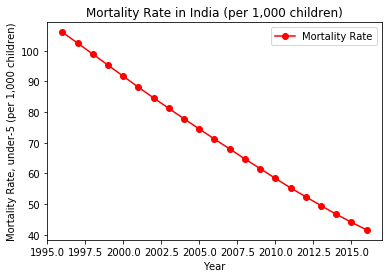

In [27]:
plt.plot(IIM_ind['Year'], IIM_ind['Mortality rate, under-5 (per 1,000)'], color = 'red', marker='o', label = 'Mortality Rate')
plt.xlabel('Year')
plt.ylabel('Mortality Rate, under-5 (per 1,000 children)')
plt.title('Mortality Rate in India (per 1,000 children)')
plt.legend()
plt.show()